# Week 1 - Analysing Returns

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline

## Basics of returns

Recall that the return from time $t$ to time ${t+1} is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [2]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [3]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [4]:
returns = prices/prices.shift(1) - 1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [5]:
returns2 = prices.pct_change()
returns2

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


### Reading data from a CSV file

In [6]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [7]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [8]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [9]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

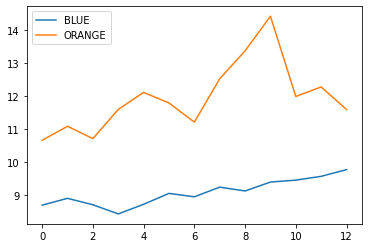

In [10]:
prices.plot()

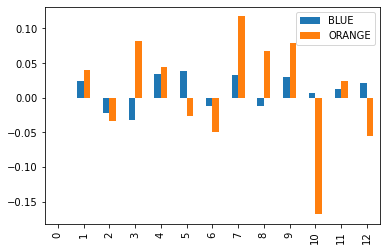

In [11]:
returns.plot.bar()

### Compounding Returns

If we look at two time periods, the overall returns is not just the sum of the returns over the two periods. 
For example, consider the variation of price during two time periods:

$$
P_1 = P_0 + R_{0,1}P_0
\qquad\text{and}\qquad 
P_2 = P_1 + R_{1,2}P_1. 
$$

Substitue $P_1$ into $P_2$:

$$
P_2 = P_0 + R_{0,1}P_0 + R_{1,2}( P_0 + R_{0,1}P_0 ) = P_0 + R_{0,1}P_0 + R_{1,2}P_0 + R_{1,2}R_{0,1}P_0.
$$

Hence, the **total return** over the period $(0,2)$ is given by:

$$
R_{0,2} = \frac{P_2}{P_0} - 1 
= 1 + R_{0,1}+R_{1,2}+R_{1,2}R_{0,1} - 1 
= (1 + R_{0,1})(1 + R_{1,2}) - 1.
$$

That is, in general, given a time frame $(t, t+k)$, with $k>1$:

$$
R_{t,t+k} = (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k}) - 1.
$$

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

Let's compute the compounded return of our two series.

In [12]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [13]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [14]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [15]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [16]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

### Annualizing Returns


#### General formula

The formula above works for any kind of available returns that we may have, e.g., daily, weekly, or monthly returns. 
The difference would be in the numerator of the power.

For example, if we have a series of **daily returns**, then the annualized return is given by:

$$
R_{py} 
= \left(1 + \underbrace{R_{pd}}\right)^{252} - 1
= \left(1 + \underbrace{(1+R_{total})^{1/N_{\text{rets}}} - 1}\right)^{252} - 1 = (1 + R_{total})^{252/N_{\text{rets}}} - 1,
$$

where again, $R_{total}$ is the compound (total) return of the series of (daily) returns that we have, 
$252$ is the approximate number of (**trading**) days in one year, and $N_{\text{rets}}$ is the lenght of our series of returns. 

**In general**:
$$
R_{py} = (1 + R_{total})^{P_{y}/N_{\text{rets}}} - 1,
\quad\text{where}\quad
P_{y} =
\begin{cases}
&252  & \text{if we have daily returns},\\
&52   & \text{if we have weekly returns},\\
&12  & \text{if we have monthly returns.}
\end{cases}
$$

The variable $P_y$ is called **periods_per_year**.


To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [17]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [18]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

# Risk Adjusted returns

### Volatility (or risk)

The **volatility** of an asset is simply the standard deviation of the returns of the asset:
$$
\sigma := \sqrt{  \frac{1}{N-1} \sum_{t} (R_t - \mu)^2  },
$$
where $R_t$ is our series of returns at time $t$ and $\mu$ is the sample mean of the returns, i.e., $\mu := \frac{1}{N}\sum_{t}R_t$, 
with $N$ denoting the number of returns.

We've seen that the volatility is measured by the average squared deviation from the mean, which is the standard deviation.

Let's read the sample returns that we've been working with.

In [19]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Notice that the first set of returns are NaN, which is Pandas way of saying that it's an NA. We can drop that row using the .dropna() method.



In [20]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Let's compute the standard deviation from first principals:

In [21]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

In [22]:
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Let's see if we get the same answer when we use the built-in .std() method.

In [23]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Why don't they match? Because, by default, the .std() method computes the *sample standard deviation* which means that it uses the denominator of $n-1$. On the other hand, we computed the *population standard deviation*, which uses a numerator of $n$. Since the observed returns are thought of as observed samples from a distribution, it is probably more accurate to use the denominator of $n-1$, so let's redo our calculation to see if we get the same number.

To get the number of observations, we can use the .shape attribute of a DataFrame that returns a tuple of the number of rows and columns.

In [24]:
returns.shape

(12, 2)

Just as we can with a list, we can access the elements of a tuple using an index, starting at 0. Therefore, to get the number of rows in the DataFrame, we extract the 0th element of the tuple.

In [25]:
number_of_obs = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [26]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

### Adjusting the volatility

Suppose that we have **monthly** returns and we compute the volatily of our asset, that is, we compute the **monthly volatility**. 
What if we want to know the **volatility over the year?** 
It is clear that we cannot compare the volatility obtained from data corresponding to different time scales. 
The way to proceed is the following:
$$
\sigma_{ann} = \sigma_{p} \sqrt{p},
$$
where $\sigma_{ann}$ is the **annualized volatility**, or volatility per year, whereas $p$ stands for the period considered 
and $\sigma_p$ the corresponding computed volatility. 

For example:

1) In case of **monthly** returns with volatility $\sigma_m$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_m\sqrt{12}$;

2) In case of **weekly** returns with volatility $\sigma_w$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_w\sqrt{52}$;

3) In case of **daily** returns with volatility $\sigma_d$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_d\sqrt{252}$.

In [27]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [28]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

### Risk Adjusted Returns
Let's get beyond the sample data series and start working with some real data. Read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, we only want to look at the largest cap and the smallest cap companies:

In [29]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",             # The header is in the first row,
                   header=0, index_col=0, parse_dates=True, na_values=-99.99) # parse dates,
                                                                              # -99 is NA
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [30]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Note that the data is already given in percentages (i.e 4.5 instead of 0.045) and we typically want to use the actual numbers (i.e. 0.045 instead of 4.5) so we should divide the raw data from the file by 100.

In [31]:
returns = returns/100

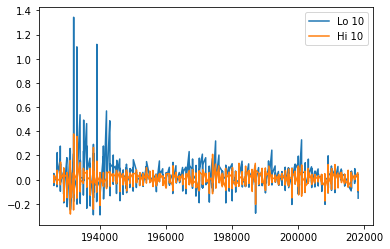

In [32]:
returns.plot()

In [33]:
# Change the naems of columns
returns.columns = ['SmallCap', 'LargeCap'] 

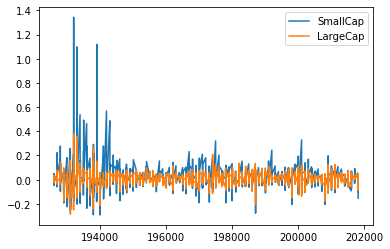

In [34]:
returns.plot()

In [35]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

We can now compute the annualized returns as follows:

In [36]:
n_months = returns.shape[0]  # number of returns

# return_per_month = (returns+1).prod() <- Return in total period

return_per_month = (returns+1).prod()**(1/n_months) - 1  # Return just by one month
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [37]:
annualized_return = (return_per_month + 1)**12-1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [38]:
# Direct way

annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

### Return on Risk Ratio


$$
Return on Risk Ratio = \frac{Return}{Volatility}
$$


In [39]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

### Sharpe Ratio


$$
Sharpe Ratio = \frac{Return - Free Rate}{Volatility}
$$

or

$$
Sharpe Ratio = \frac{R_{p}  - R_{f}}{\sigma}
$$


In [40]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

## Computing Maximum Drawdown

In [41]:
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [42]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

The dtype is int64 which suggests that it was not automatically converted to a date time index, so let's do that now manually. The simplest way to force it to be a timeseries is by reformatting the index data to a datetime type as follows:

In [43]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [44]:
returns.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


Now that the DataFrame has a datetime index, we can treat the entire dataframe as a timeseries, which makes things very convenient. For instance, we can extract just the returns in 2008 as follows:

In [45]:
returns["2008"]

,SmallCap,LargeCap
2008-01-01,-0.0436,-0.0490
2008-02-01,-0.0203,-0.0250
2008-03-01,-0.0440,-0.0122
2008-04-01,0.0027,0.0492
2008-05-01,0.0286,0.0161
2008-06-01,-0.0816,-0.1015
2008-07-01,-0.0079,-0.0140
2008-08-01,0.0110,0.0087
2008-09-01,-0.1274,-0.1155
2008-10-01,-0.2041,-0.1763


This looks good except that we know this is monthly data, and it's showing up with an index that is date stamped. We can fix this using the to_period method. We'll see several more examples of Pandas support for timeseries during the course.

In [46]:
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [47]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [48]:
returns.describe()

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


## Drawdowns


$$
Drawdown_{perc} = \frac{Wealth - LastPeak}{lastPeak}
$$


## Computing Drawdowns

    1. Convert the time series of returns to a time series that represents a wealth index
    2. Compute a time series of the previous peaks
    3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

In [49]:
wealth_index = 1000*(1+returns["LargeCap"]).cumprod() #1000 Dollars applied

wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

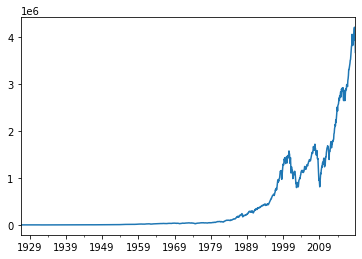

In [50]:
wealth_index.plot()

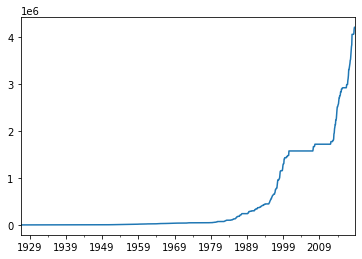

In [51]:
previous_peaks = wealth_index.cummax()

previous_peaks.plot()

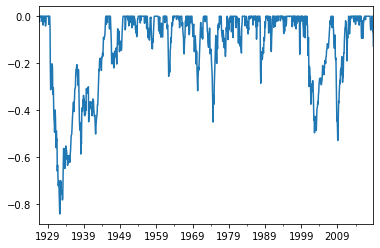

In [52]:
drawdown = (wealth_index - previous_peaks)/previous_peaks

drawdown.plot()

In [53]:
drawdown.min()

-0.8400375277943123

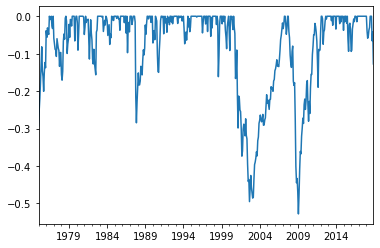

In [54]:
drawdown["1975":].plot()

In [55]:
drawdown["1975":].min()  # Give me the maximum drawdown since 1975

-0.5280945042309304

When exactly did this happen?

In [56]:
drawdown["1975":].idxmin()  # Index of the minimum

Period('2009-02', 'M')

In [57]:
drawdown.idxmin()  # Index of the minimum for all the times

Period('1932-05', 'M')


### Creating a Drawdown Function
Redoing this analysis for SmallCap would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create our first function that will form the first tool in our financial toolkit.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [58]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [59]:
drawdown(returns["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [60]:
# Only selected columns

drawdown(returns["LargeCap"])[["Wealth", "Previous Peak"]].head()

,Wealth,Previous Peak
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


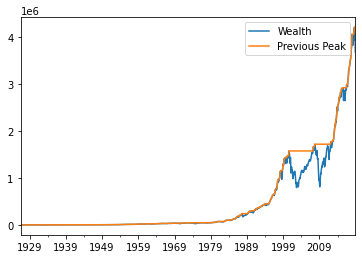

In [61]:
drawdown(returns["LargeCap"])[["Wealth", "Previous Peak"]].plot()

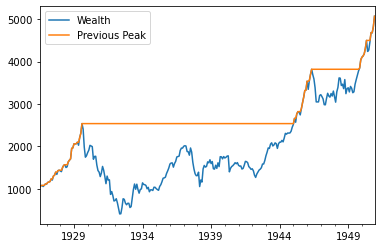

In [62]:
# Before 1950
drawdown(returns[:"1950"]["LargeCap"])[["Wealth", "Previous Peak"]].plot()

When was the minimum in this period?

In [63]:
drawdown(returns[:"1950"]["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

Minimum "LargeCap" parameters for all the times

In [64]:
drawdown(returns["LargeCap"]).min()

Wealth            405.769102
Previous Peak    1032.900000
Drawdown           -0.840038
dtype: float64

In [65]:
drawdown(returns["SmallCap"]).min()

Wealth           491.240323
Previous Peak    985.500000
Drawdown          -0.833001
dtype: float64

In [66]:
drawdown(returns["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [67]:
drawdown(returns["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [68]:
drawdown(returns["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [69]:
drawdown(returns["SmallCap"])["Drawdown"].min()

-0.8330007793945303

After 1940:

In [70]:
drawdown(returns["SmallCap"]["1940":])["Drawdown"].min()

-0.7000596091967917

In [71]:
drawdown(returns["SmallCap"]["1940":])["Drawdown"].idxmin()

Period('1974-12', 'M')

After 1975:

In [72]:
drawdown(returns["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [73]:
drawdown(returns["LargeCap"]["1975":])["Drawdown"].min()

-0.5280945042309303

In [74]:
drawdown(returns["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [75]:
drawdown(returns["SmallCap"]["1975":])["Drawdown"].min()

-0.6312068077252386

## Building Modules

    1. Createa new text file; 
    2. Rename as "name_of_your_module", extension ".py";
    3. Write your code, and save.
    
In your program just code *import* your name_of_your_module

**import** name_of_your_module **as** h

Example:
        
In your module type:
        
        message = "Hello, World."
        
When you type in your program:
        
        h.message
        
In your program shows up:
        
        "Hello, World."
        


Important: If a change was made in the module, you need use in your program the magic command 

        %load_ext autoreload
        
Then type 

        %autoreload 2 
        
This say to the Python System: "Now, you are in the autoreload mode. Every time that some changes was made in the module, reload it."

In [76]:
%load_ext autoreload
%autoreload 2 

In [77]:
import edhec_risk_kit as erk

returns = erk.get_ffme_returns()

In [78]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [79]:
erk.drawdown(returns["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [80]:
erk.drawdown(returns["1975":]["SmallCap"])["Drawdown"].min()

-0.6312068077252386

## Deviations from Normality

In [81]:
%autoreload

In [82]:
hfi = erk.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


### Skewness

$$
S(R) = \frac{E [(R-E(R))^3]}{\sigma^3}
$$

Skewness is just nothing more than the demeaned returns, cube it, take the mean of that, and divide by the volatility cubed.

Intuitively, a negative skew means that you get more negative returns than you would have expected if the returns were distributed like the normal distribution.

Another way of thinking about it is if that returns are normally distributed, the mean and the median would be very close.

However, if they are negatively skewed, the expected value i.e. the mean is less than the median. If they are positively skewed, the expected value (again, the mean) is greater than the median.

There already is skewness and kurtosis code in a module called scifi.stats, and we'll use scifi.stats later, but I thought it would be more useful for us to actually develop our own code.

In [83]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis=1) # mean, median and querstion if mean > median

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


Most of these markets have negative skewness (median > mean)

$$
S(R) = \frac{E [(R-E(R))^3]}{\sigma^3}
$$

In [84]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [85]:
skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

Just to see if we get the same answer, let's use the skewness function that is built into scipy.stats

In [86]:
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

Finally, let's look at the skewness that you would expect from a truly random sequence of returns. Let's use the random normal generator from numpy and generate the same number of returns as we have for the hedge fund data.

In [87]:
hfi.shape

(263, 13)

In [88]:
normal_rets = np.random.normal(0, 0.15, (263, 1))

In [89]:
normal_rets.mean(), normal_rets.std()

(0.007762914395035087, 0.14819156838280959)

In [90]:
erk.skewness(normal_rets)

0.03050380294711766

### Kurtosis

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

Kurtosis is given by:


$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$


This is very similar to the skewness, so we can just copy and paste it and then edit it to compute the 4th rather than the 3rd power (as was the case for skewness).

In [91]:
%autoreload 2

In [92]:
erk.kurtosis(normal_rets)

2.848688577872297

In [93]:
scipy.stats.kurtosis(normal_rets)

array([-0.15131142])

We said that normally generated returns should have a kurtosis of about **three**, and let's take a look at this, because it's giving you a kurtosis of zero, and this is how that particular piece of code works. It's giving you, even though it says kurtosis what it's really doing is, it's giving you the excess kurtosis. **It's giving you the excess kurtosis over the expected kurtosis of three**, and we just have to remember this, that our kurtosis is not subtracting the three, whereas the scipy.stats.kurtosis gives you the excess kurtosis.

In [94]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [95]:
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

### Running the Jarque-Bera Test for Normality
The scipy.stats module contains a function that runs the Jarque-Bera test on a sequence of numbers. Let's apply that to the normally generated returns:

In [96]:
scipy.stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=0.2916787741073316, pvalue=0.8642965092461755)

The first number is the test statistic and the second number is the one we want. It represents the p-value for the hypothesis test. If you want to run the test at a 1% level of significance, you want this number to be greater than 0.01 to accept the hypothesis that the data is normally distributed, and if that number is less than 0.01 then you must reject the hypothesis of normality.

In this case, since we got a number higher than 0.01 we can accept the hypothesis that the numbers are random. Now, let's try this on our different hedge fund indice

In [97]:
scipy.stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

Why didn't we get the results for the individual indices? Because the implementation of the test isn't smart enough to realize that we want to treat each column as a separate set of returns. We can write out own wrapper for it to fix that, so let's start by writing a simple wrapper, and adding this code to our python file:

```python
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level
```

In [98]:
%autoreload 2

In [99]:
erk.is_normal(normal_rets)

True

In [100]:
erk.is_normal(hfi)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

There are a few different ways to handle the problem. The first is to use the .aggregate method on a dataframe, that takes a function as an argument and applies that function to each column:

In [101]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

However, we can fix this in our wrapper so that we have a uniform interface to test normality:

```python
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level
```

In [102]:
%autoreload 2

In [103]:
isinstance(hfi, pd.DataFrame)

True

In [104]:
erk.is_normal(normal_rets)

True

### Testing CRSP SmallCap and Large Cap returns for Normality
Let's see whether any of the returns we've been studying so far pass the normality hypothesis.

In [105]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [106]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [107]:
erk.is_normal(ffme)

SmallCap    False
LargeCap    False
dtype: bool

## Downside Measures: SemiDeviation, VaR and CVaR¶

We're going to look at a few measures of downside risk. We've already seen how to compute drawdowns, but we're going to look at 3 popular measures, and we are going to develop code to compute these and add them to our toolbox.

The first measure is the simplest, which is the semideviation, which is nothing more than the volatility of the subset of returns that are negative.

### SemiDeviation

In [108]:
hfi = erk.get_hfi_returns()

In [109]:
hfi.std(ddof = 0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [110]:
hfi[hfi<0].std(ddof = 0)  # mask hfi<0

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

The code is very simple:
```python
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)
```

In [111]:
erk.semideviation(hfi)  # We expect the same result

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVaR

We'll look at three different ways to compute Value At Risk

    1. Historic VaR
    2. Parametric Gaussian VaR
    3. Modified (Cornish-Fisher) VaR

To compute the **historic VaR** at a certain level, say 5%, all we have to do is to find the number such that 5% of the returns fall below that number and 95% of the returns fall above that number. In other words, we want the 5 percentile return.

Fortunately, numpy has a np.percentile function that computes exactly that.

In [112]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

The way I'd interpret that is that the first one, refers to the first column, the first column is **convertible arbitrage**, and convertible arbitrage, there's a **five percent chance** that in any given month, you're going to **lose about 1.5 percent or worse**. 

Add the following code to the edhec_risk_kit.py file:

```python
def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")
```

In [113]:
%autoreload 2

In [114]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

Note that for reporting purposes, it is common to invert the sign so we report a positive number to represent the loss i.e. the amount that is at risk.

In [115]:
erk.var_historic(hfi, level=1)  # There is 1% of chance that in any given month, you're going to lose about...

Convertible Arbitrage     0.031776
CTA Global                0.049542
Distressed Securities     0.046654
Emerging Markets          0.088466
Equity Market Neutral     0.018000
Event Driven              0.048612
Fixed Income Arbitrage    0.041672
Global Macro              0.024316
Long/Short Equity         0.049558
Merger Arbitrage          0.025336
Relative Value            0.026660
Short Selling             0.113576
Funds Of Funds            0.039664
dtype: float64

### Parametric Gaussian VaR
The idea behind this is very simple. If a set of returns is normally distributed, we know, for instance, that 50% of the returns are below the mean and 50% are above.

We also know that approx two thirds of the returns lie within 1 standard deviation. That means one third lie beyond one standard deviation from the mean. Since the normal distribution is symmetric, approximately one sixth (approx 16%) lie below one standard deviation away from the mean. Therefore, if we know the mean and standard deviation and if we assume that the returns are normally distributed, the 16% VaR would be the mean minus one standard deviation.

In general we can always convert a percentile point to a z-score (which is the number of standard deviations away from the mean that a number is). Therefore, if we can convert the VaR level (such as 1% or 5%) to a z-score, we can calculate the return level where that percent of returns lie below it.

In [116]:
from scipy.stats import norm

Norm.ppf is a function which is the percent point function. We have a percent like 0.05 or five percent and we want to convert that to a z-score, because then we know how many standard deviations away from the mean this cutoff line of five percent is. What does that return to you? It returns an actual z-score.

In [117]:
z = norm.ppf(.05)
z

-1.6448536269514729

In [118]:
hfi.mean() + z*hfi.std(ddof=0)  # Value at Risk at the five percent level

Convertible Arbitrage    -0.021691
CTA Global               -0.034235
Distressed Securities    -0.021032
Emerging Markets         -0.047164
Equity Market Neutral    -0.008850
Event Driven             -0.021144
Fixed Income Arbitrage   -0.014579
Global Macro             -0.018766
Long/Short Equity        -0.026397
Merger Arbitrage         -0.010435
Relative Value           -0.013061
Short Selling            -0.080086
Funds Of Funds           -0.021292
dtype: float64

In [119]:
-(hfi.mean() + z*hfi.std(ddof=0)) # Because we want positive numbers

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

Therefore, all we need to do to estimate the VaR using this method is to find the z-score corresponding to percentile level, and then add that many standard deviations to the mean, to obtain the VaR.

```python
from scipy.stats import norm
def var_gaussian(r, level=5):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))
```

In [120]:
%autoreload 2

In [121]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [122]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### Cornish-Fisher Modification
The Cornish-Fisher modification is an elegant and simple adjustment.

The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If the returns arent normal, we know that z-score will give us an inaccurate number. The basic idea is that since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to come up with a modifed z-score. e.g. intuitively, all other things being equal, if the skewness is negative, we'll decrease the z-score further down, and if the skewness is positive, we'll push it up.

The adjusted z-score which we'll call $z_{cornishfisher}$ given by:

$$ 
z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 
$$

We can modify the previous function by adding a "modified" parameter with a default value of True as follows. If True then the following piece of code is executed, which modifes z:

```python
if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
```
        
The rewritten function is:

```python
from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )

    return -(r.mean() + z*r.std(ddof=0))
```

We can now compare the different methods:

In [123]:
%autoreload 2

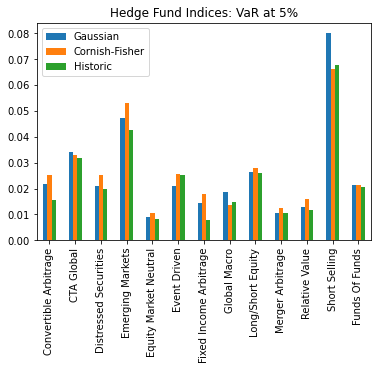

In [124]:
var_table = [erk.var_gaussian(hfi), 
             erk.var_gaussian(hfi, modified=True), 
             erk.var_historic(hfi)]

comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

In some cases let's compare the Cornish-Fisher and the Gaussian for example, so that's the adjustment. In this case, the Cornish- Fisher has a higher VaR, there's a higher value at risk. 

There are situations where actually the Cornish- Fisher could decrease the stated VaR and it's all a function of whether the skewness is positive or negative, what the extent, how fat the tails are, etc.

Note that in some cases, the cornish-fisher VaR is lower i.e. estimates a smaller loss than you would get from a pure gaussian assumption. That can happen if the observed skewness is positive, as is the case for "Short Selling" and "Global Macro"

In [125]:
erk.skewness(hfi).sort_values(ascending=False)

Global Macro              0.982922
Short Selling             0.767975
CTA Global                0.173699
Funds Of Funds           -0.361783
Long/Short Equity        -0.390227
Emerging Markets         -1.167067
Distressed Securities    -1.300842
Merger Arbitrage         -1.320083
Event Driven             -1.409154
Relative Value           -1.815470
Equity Market Neutral    -2.124435
Convertible Arbitrage    -2.639592
Fixed Income Arbitrage   -3.940320
dtype: float64

### Conditional VaR aka Beyond VaR
Now that we have the VaR, the CVaR is very easy. All we need is to find the mean of the numbers that fell below the VaR!

CVar is nothing more than the average of all those returns that are worse than the VaR. 

```python
def cvar_historic(r, level=5):
    """
    Computes the Conditiona VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r,level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic,level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")
```

In [126]:
%autoreload 2

In [127]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

That number says, if that five percent chance happens, that is **the worst five percent** of the possible cases. When those things happen, the average of that is a **3.6 percent loss** in a month. If you're invested in the **convertible arbitrage** hedge fund.

In [128]:
erk.cvar_historic(hfi, level=1).sort_values()

Global Macro              0.029333
Equity Market Neutral     0.036100
Merger Arbitrage          0.036233
Relative Value            0.052367
CTA Global                0.054767
Funds Of Funds            0.061133
Long/Short Equity         0.061867
Distressed Securities     0.070967
Event Driven              0.071267
Fixed Income Arbitrage    0.072467
Convertible Arbitrage     0.086100
Short Selling             0.123867
Emerging Markets          0.141167
dtype: float64

In [129]:
erk.cvar_historic(ffme)

SmallCap    0.162609
LargeCap    0.121277
dtype: float64